In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/datasets/Weather.csv')

X = np.array(data['MinTemp']).reshape(-1,1)
Y = np.array(data['MaxTemp'])


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,Y,test_size=0.2,random_state=6)

In [4]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
ytest_predicted = lr.predict(xtest)

In [6]:
import sklearn.metrics as sm
print("Mean Absolute Error :",round(sm.mean_absolute_error(ytest,ytest_predicted),2))
print("Mean Squared Error :",round(sm.mean_squared_error(ytest,ytest_predicted),2))
print("Median Absolute Error :",round(sm.median_absolute_error(ytest,ytest_predicted),2))
print("Explained Variance Score :",round(sm.explained_variance_score(ytest,ytest_predicted),2))
print("R^2 Score :",round(sm.r2_score(ytest,ytest_predicted),2))

Mean Absolute Error : 3.18
Mean Squared Error : 17.11
Median Absolute Error : 2.6
Explained Variance Score : 0.77
R^2 Score : 0.77


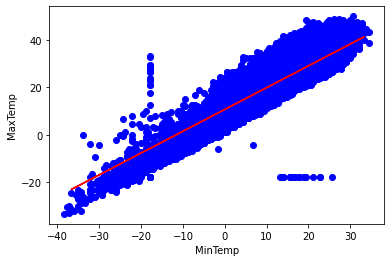

In [7]:
import matplotlib.pyplot as plt
plt.scatter(xtrain,ytrain,color="blue")
plt.plot(xtest,ytest_predicted,color='red')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [8]:
import pickle
pickle.dump(lr,open('ex3.pkl','wb'))

In [9]:
nlr = pickle.load(open('ex3.pkl','rb'))
xtest_n = [[30.0]]
ytest_n = nlr.predict(xtest_n)
ytest_n

array([38.26330996])